<a href="https://colab.research.google.com/github/Marcotmr/Google-Stock-Price-Model/blob/main/Stock_price_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Google_Stock_Price_Train.csv"

In [ ]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#load dataset
dataset_train = pd.read_csv(path)
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
#use open stock price to train model
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [ ]:
#Normalize datset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
#Create X_train and y_train data structures
X_train = []
y_train = []
for i in range (60,1258):
  X_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [ ]:
#Reshape data
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [ ]:
#Building model by importing libraries and adding different layers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
#Layers
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [ ]:
#Fitting the model
regressor.compile(optimizer = 'adam', loss= 'mean_squared_error')
regressor.fit(X_train,y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 11s 108ms/step - loss: 0.0341
Epoch 2/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0055
Epoch 3/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0042
Epoch 13/100

In [ ]:
#Extracting actual stock prices of jan-2017
testpath = "/content/drive/MyDrive/Google_Stock_Price_Test.csv"
dataset_test = pd.read_csv(testpath)
actual_stock_price = dataset_test.iloc[:,1:2].values

In [ ]:
#Preparing input for model
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [ ]:
#predicting values for jan 2017 values
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


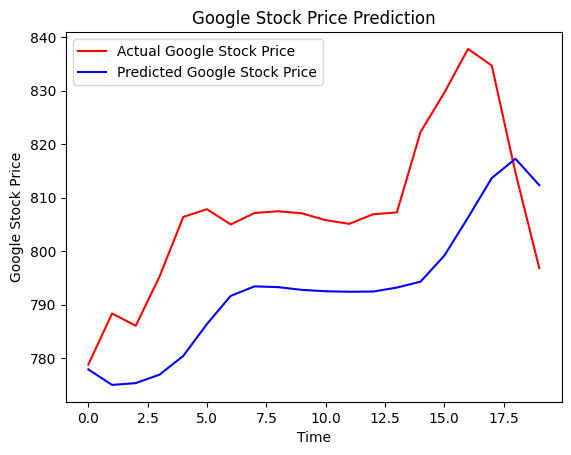

In [ ]:
#plotting actual and predicted prices for google stocks
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()